In [100]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score,make_scorer
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [101]:
# Import dataset 
df=pd.read_csv('Boston-house-price-data.csv')

In [102]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [103]:
# Renaming columns to be more understandable
df.columns=['CrimeRate','ResLandZone','NonRetailBusAcres','CharlesRiver',
            'NOX','AvgRooms','OlderUnitsPercent','EmpDist','HighwayAccessIndex',
            'PropTaxRate','PupilTeacherRatio','BlackPop','LowerStatPopPercent','MedianHomeVal']

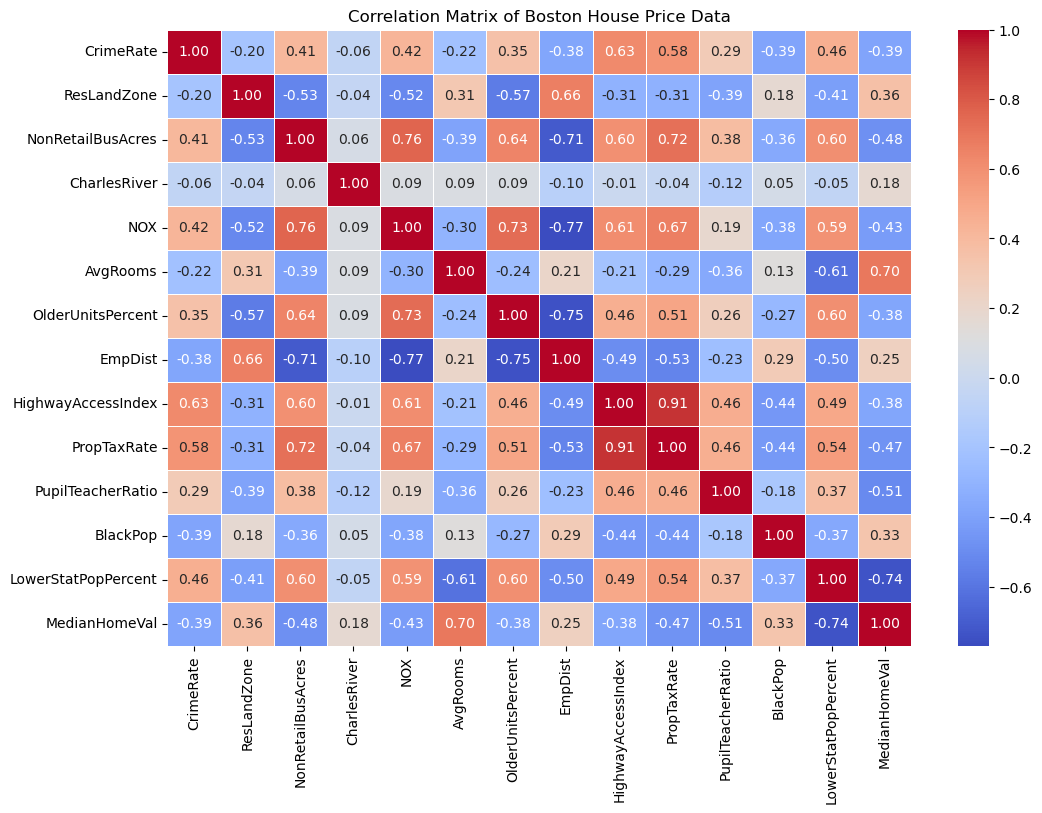

LowerStatPopPercent   -0.737663
PupilTeacherRatio     -0.507787
NonRetailBusAcres     -0.483725
PropTaxRate           -0.468536
NOX                   -0.427321
CrimeRate             -0.388305
HighwayAccessIndex    -0.381626
OlderUnitsPercent     -0.376955
CharlesRiver           0.175260
EmpDist                0.249929
BlackPop               0.333461
ResLandZone            0.360445
AvgRooms               0.695360
Name: MedianHomeVal, dtype: float64

In [104]:
# Running correlation matrix analysis
correlation_matrix = df.corr()

# Visualizing correlation matrix to identify highly correlated features
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Boston House Price Data")
plt.show()

# Display correlations of features with the target variable 'MedianHomeValue' to identify weakly correlated ones
target_correlation = correlation_matrix['MedianHomeVal'].drop('MedianHomeVal').sort_values()
target_correlation

In [105]:
# Dropping columns with weak correlation to target variable
df.drop(['CharlesRiver', 'EmpDist'], axis=1, inplace=True)

# Display the first few rows to confirm changes
df.head()

,CrimeRate,ResLandZone,NonRetailBusAcres,NOX,AvgRooms,OlderUnitsPercent,HighwayAccessIndex,PropTaxRate,PupilTeacherRatio,BlackPop,LowerStatPopPercent,MedianHomeVal
0,0.00632,18.0,2.31,0.538,6.575,65.2,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,3,222.0,18.7,396.90,5.33,36.2


In [106]:
# Looking for missing values
missing_vals=df.isnull().sum()
missing_vals

CrimeRate              0
ResLandZone            0
NonRetailBusAcres      0
NOX                    0
AvgRooms               0
OlderUnitsPercent      0
HighwayAccessIndex     0
PropTaxRate            0
PupilTeacherRatio      0
BlackPop               0
LowerStatPopPercent    0
MedianHomeVal          0
dtype: int64

In [107]:
# 2. Classification Models to predict the prices of the house(binary classification based on median price)

# Define the target variable(MedianHomeVal)
median_val = df['MedianHomeVal'].median()

# Create a binary target variable for classification
df['Price'] = (df['MedianHomeVal'] >= median_val).astype(int)

# Separate the features and the new binary target variable
X = df.drop(['MedianHomeVal', 'Price'], axis=1)
y = df['Price']

In [108]:
# Split data for regression into training(70%) and testing(30%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression

In [109]:
# Initialize the Logistic Regression model
LogR = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model on the training data
LogR.fit(X_train, y_train)

# Predict on the testing set
y_pred_LogR = LogR.predict(X_test)

In [110]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_LogR)
print(f"Accuracy: {accuracy:.2f}")

# Display a classification report for precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred_LogR))

# Display a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_LogR))

Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85        90
           1       0.76      0.84      0.80        62

    accuracy                           0.83       152
   macro avg       0.82      0.83      0.83       152
weighted avg       0.83      0.83      0.83       152

Confusion Matrix:
 [[74 16]
 [10 52]]


# Decision Tree Classifier

In [111]:
# Initialize the DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

# Fit the model on the training data
dt.fit(X_train, y_train)

# Predict on the testing set
y_pred_dt = dt.predict(X_test)

pred=pd.DataFrame({'Actual':y_test,'Predicted':y_pred_dt})
pred

,Actual,Predicted
173,1,1
274,1,1
491,0,0
72,1,1
452,0,0
...,...,...
441,0,0
23,0,0
225,1,1
433,0,0


In [112]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy:.2f}")

# Display a classification report for precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Display a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.77      0.83        90
           1       0.72      0.89      0.80        62

    accuracy                           0.82       152
   macro avg       0.82      0.83      0.81       152
weighted avg       0.83      0.82      0.82       152

Confusion Matrix:
 [[69 21]
 [ 7 55]]


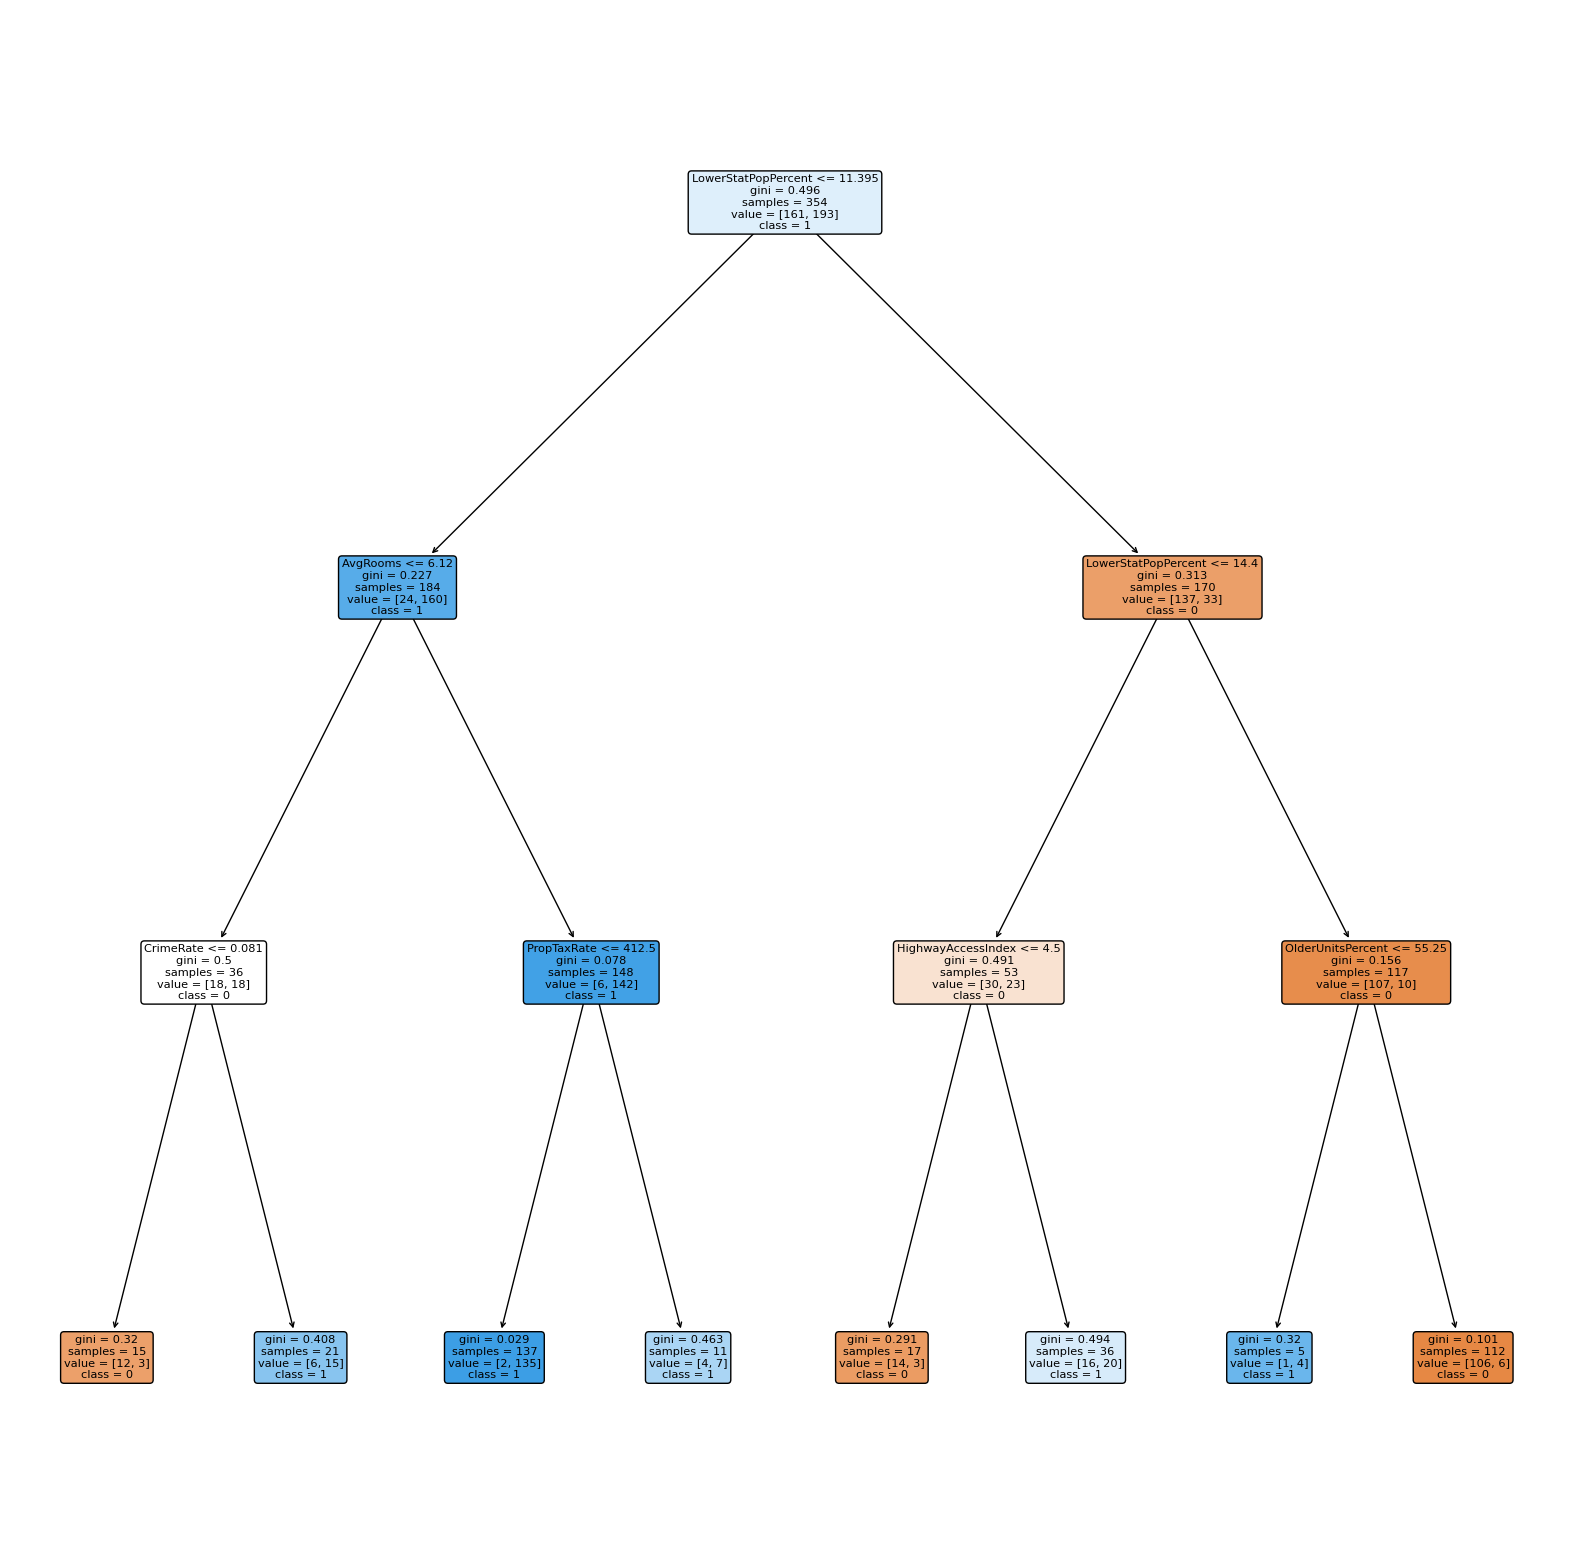

In [113]:
#plot the decision tree
plt.figure(figsize=(20, 20))
tree.plot_tree(dt,
               feature_names=X_train.columns.tolist(),
               class_names=['0', '1'],
               filled=True,
               rounded=True)
plt.show()

# Random Forest Model

In [114]:
# Initialize the DecisionTreeClassifier
random_forest = RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=None, random_state=42)

# Fit the model on the training data
random_forest.fit(X_train, y_train)


# Predict on the testing set
y_pred_rf = random_forest.predict(X_test)

# Get feature importances from the model
feature_imp = random_forest.feature_importances_
features = X_train.columns
imp_df = pd.DataFrame({'Feature': features, 'Importance': feature_imp})

# Sort feature importances
imp_df = imp_df.sort_values(by='Importance', ascending=False)
imp_df

,Feature,Importance
10,LowerStatPopPercent,0.309984
4,AvgRooms,0.156406
8,PupilTeacherRatio,0.116156
5,OlderUnitsPercent,0.077163
7,PropTaxRate,0.075587
3,NOX,0.074599
0,CrimeRate,0.065611
2,NonRetailBusAcres,0.051390
9,BlackPop,0.044889
6,HighwayAccessIndex,0.019855


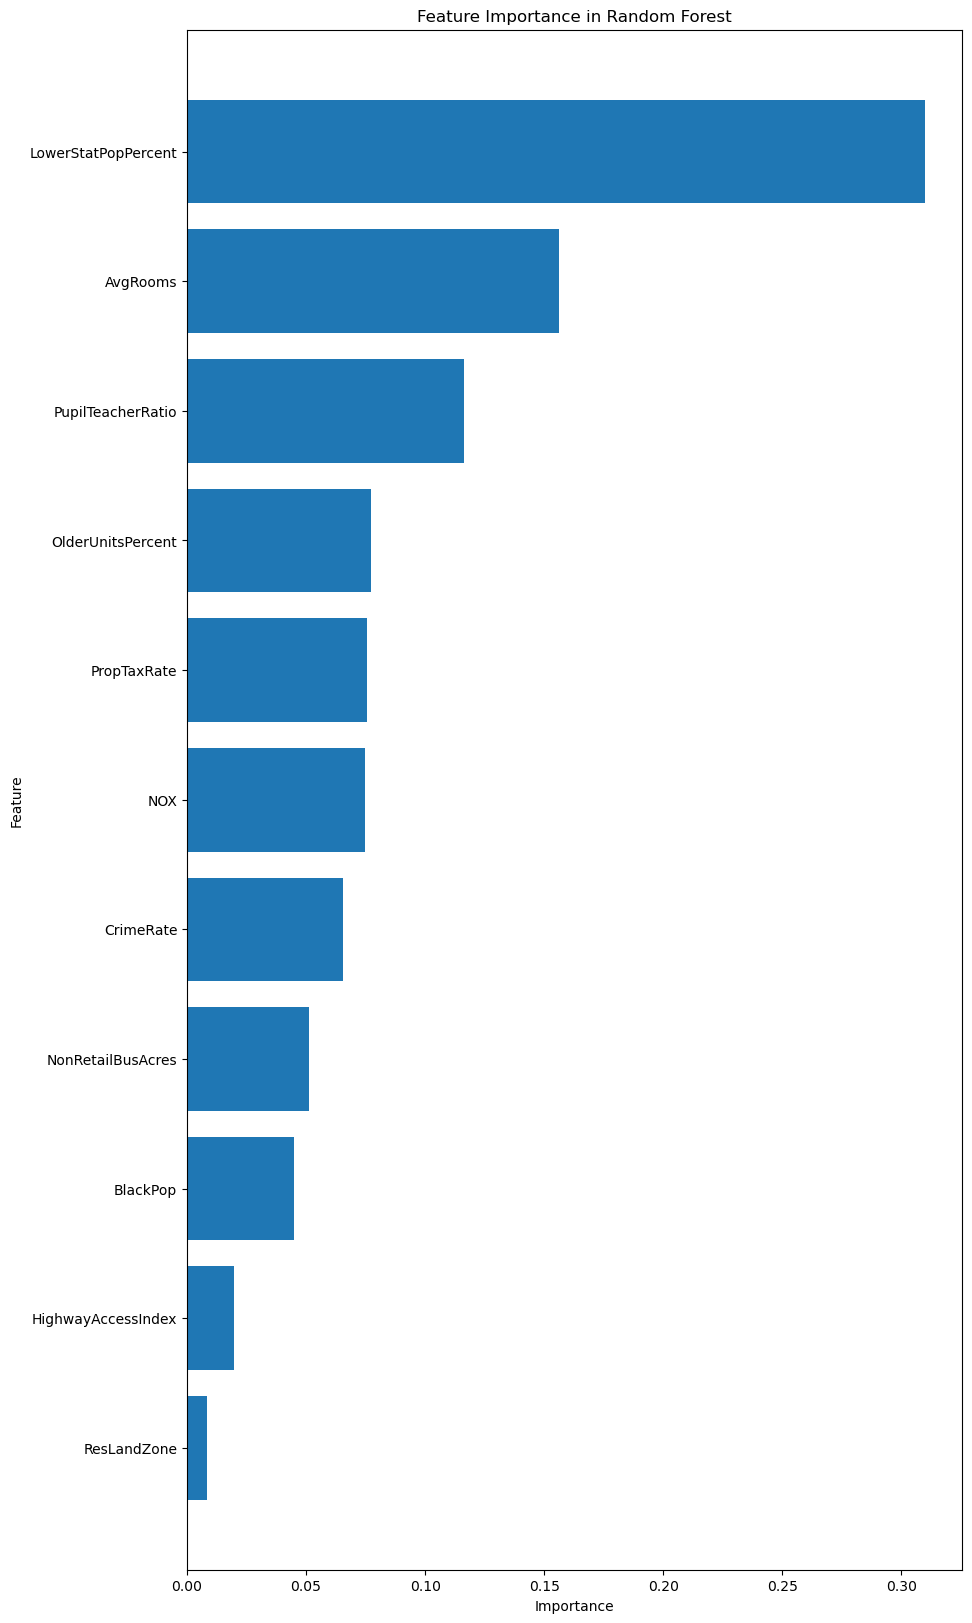

In [115]:
# Plot the important features
plt.figure(figsize=(10, 20))
plt.barh(imp_df['Feature'], imp_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()

In [116]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.2f}")

# Display a classification report for precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Display a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.82      0.87        90
           1       0.77      0.89      0.83        62

    accuracy                           0.85       152
   macro avg       0.84      0.85      0.85       152
weighted avg       0.86      0.85      0.85       152

Confusion Matrix:
 [[74 16]
 [ 7 55]]


# Gradient Boosting Classifier

In [117]:
# Initialize the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100,learning_rate=0.05,
                                 max_depth=5,random_state=42)

# Fit the model on the training data
gbc.fit(X_train, y_train)

# Predict on the testing set
y_pred_gbc = gbc.predict(X_test)

In [118]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_gbc)
print(f"Accuracy: {accuracy:.2f}")

# Display a classification report for precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred_gbc))

# Display a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gbc))

Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.86        90
           1       0.76      0.90      0.82        62

    accuracy                           0.84       152
   macro avg       0.84      0.85      0.84       152
weighted avg       0.86      0.84      0.84       152

Confusion Matrix:
 [[72 18]
 [ 6 56]]


# KNN

In [119]:
# Scale the features for better performance of KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [120]:
#Apply PCA to the scales data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['PC 1', 'PC 2'])

pca_df.head()

,PC 1,PC 2
0,-2.194905,-0.042127
1,-1.375097,-0.911220
2,-2.033156,-0.133823
3,-2.404498,-0.060584
4,-2.247287,-0.111951


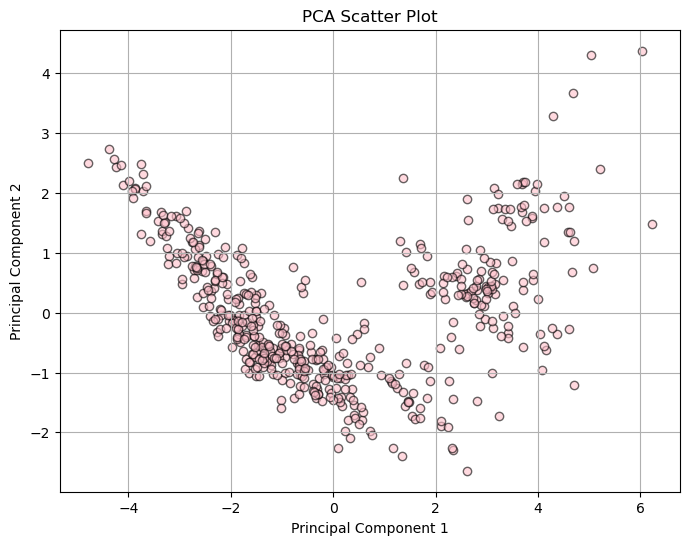

In [121]:
# Plot the PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC 1'], pca_df['PC 2'], alpha=0.6, c='pink', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.grid(True)
plt.show()

In [122]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

In [123]:
# Test different values of k and calculate the average accuracy
k_values = range(1, 30)
accuracy = []

for k in k_values:
    knn_val = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')
    accuracy.append(scores.mean())

# Find the best k value
best_k = k_values[np.argmax(accuracy)]
print(f"Best k value: {best_k}")

Best k value: 1


In [124]:
#set K value to 1
k = 1

#Apply define model
knn = KNeighborsClassifier(n_neighbors=k)

#apply to the trainig data
knn.fit(X_train, y_train)

#make predictions using the test data
y_pred_knn = knn.predict(X_test)

In [125]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy:.2f}")

# Display a classification report for precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# Display a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.69      0.75        90
           1       0.63      0.77      0.70        62

    accuracy                           0.72       152
   macro avg       0.72      0.73      0.72       152
weighted avg       0.74      0.72      0.73       152

Confusion Matrix:
 [[62 28]
 [14 48]]


# Conclusion:
The accuracy's are: <br>
Logistic Regression: 0.83 <br>
Decision Tree Classifier: 0.82 <br>
Random Forest Model: 0.85 <br>
Gradient Boosting Classifier: 0.84 <br>
KNN: 0.72 <br>

In Classification model, Random Forest Model is the best model with accuracy of 0.85.